In [1]:
import pandas as pd
import numpy as np
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

In [2]:
df = pd.read_csv('../input/iconic-on-alvarado-reviews/Iconic on Alvarado Google Reviews.csv')

In [3]:
df.head()

,rating,author_title,review_text,review_img_url,owner_answer,owner_answer_timestamp_datetime_utc,review_rating,review_datetime_utc,review_likes
0,3.5,Garrett Griffin,NaN,https://lh3.googleusercontent.com/a/AATXAJx6np...,"Garrett, on behalf of the entire Iconic on Alv...",3/4/2022 14:13,5,3/3/2022 23:39,0
1,3.5,Tanner Harvey,NaN,https://lh3.googleusercontent.com/a/AATXAJzOz1...,NaN,NaN,1,3/3/2022 13:47,0
2,3.5,Molly Hourihan,NaN,https://lh3.googleusercontent.com/a-/AOh14GjKN...,"Molly, we're so excited to see the 5-star rati...",3/1/2022 14:18,5,3/1/2022 3:39,0
3,3.5,Brianna Matonak,NaN,https://lh3.googleusercontent.com/a/AATXAJyrDu...,"Brianna, it means a lot to see your five stars...",2/17/2022 14:14,5,2/17/2022 5:46,0
4,3.5,Michael Lin,Great place to live for college! Really easy w...,https://lh3.googleusercontent.com/a/AATXAJx932...,"Michael,\nIt's wonderful to hear how much you'...",2/14/2022 18:53,5,2/14/2022 18:12,0


In [4]:
df['review_text'].iloc[4]

'Great place to live for college! Really easy way to let cool people and it is very easy to get to campus. Very much ideal for college living!'

In [5]:
pd.json_normalize(df['review_rating'].head())

""
0
1
2
3
4


In [6]:
df['review_rating'].value_counts()

5    161
1    103
4     46
3     21
2      6
Name: review_rating, dtype: int64

In [7]:
df[df['review_rating']==0.0]

,rating,author_title,review_text,review_img_url,owner_answer,owner_answer_timestamp_datetime_utc,review_rating,review_datetime_utc,review_likes


In [8]:
import re
from collections import Counter

In [9]:
def tokenize(text):
    return re.sub(r'[^a-z]+', ' ', text.lower()).split()

def termf(texts):
    return pd.Series(Counter(concat(map(tokenize, texts))))

In [10]:
df['review_text'] = df['review_text'].apply(str)
df.dtypes 

rating                                 float64
author_title                            object
review_text                             object
review_img_url                          object
owner_answer                            object
owner_answer_timestamp_datetime_utc     object
review_rating                            int64
review_datetime_utc                     object
review_likes                             int64
dtype: object

In [11]:
f = pd.DataFrame()
f['all'] = termf(tqdm(df['review_text']))

  0%|          | 0/337 [00:00<?, ?it/s]

In [12]:
f['bad'] = termf(tqdm(df[df['review_rating']==1.0]['review_text']))

  0%|          | 0/103 [00:00<?, ?it/s]

In [13]:
f = f.fillna(0)

In [14]:
f.sort_values(ascending=False, by='bad').head(100)

,all,bad
the,865,447.0
to,538,307.0
and,656,298.0
i,485,250.0
they,249,194.0
...,...,...
anything,28,19.0
charge,20,19.0
leasing,30,18.0
people,42,18.0


In [15]:
N = f['all'].sum()
N_bad = f['bad'].sum()

In [16]:
f['pmi_bad'] = np.log2(f['bad']) + np.log2(N) - np.log2(f['all']) - np.log2(N_bad)

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
f.sort_values(ascending=False, by='pmi_bad').head(50)

,all,bad,pmi_bad
painting,7,7.0,0.901474
paid,7,7.0,0.901474
unprofessional,7,7.0,0.901474
sent,7,7.0,0.901474
emailed,7,7.0,0.901474
biggest,1,1.0,0.901474
chits,1,1.0,0.901474
hire,1,1.0,0.901474
salaries,1,1.0,0.901474
respect,1,1.0,0.901474


In [18]:
f[f['all']>30].sort_values(ascending=False, by='pmi_bad').head(10)

,all,bad,pmi_bad
could,31,28.0,0.754632
not,139,119.0,0.677350
never,31,26.0,0.647717
into,43,36.0,0.645134
move,61,49.0,0.585446
them,45,36.0,0.579546
no,45,36.0,0.579546
they,249,194.0,0.541385
rent,35,27.0,0.527078
car,35,27.0,0.527078


In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [20]:
def cloud(freqs, k=200):
    plt.figure(figsize=(10,10))
    items = dict(freqs.sort_values(ascending=False).head(k))
    wc = WordCloud(width=1000, 
                   height=1000, 
                   background_color='white').generate_from_frequencies(items)
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

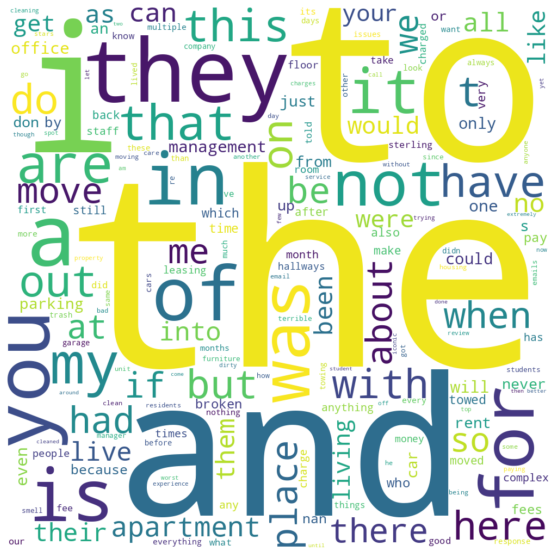

In [21]:
cloud(f['bad'])

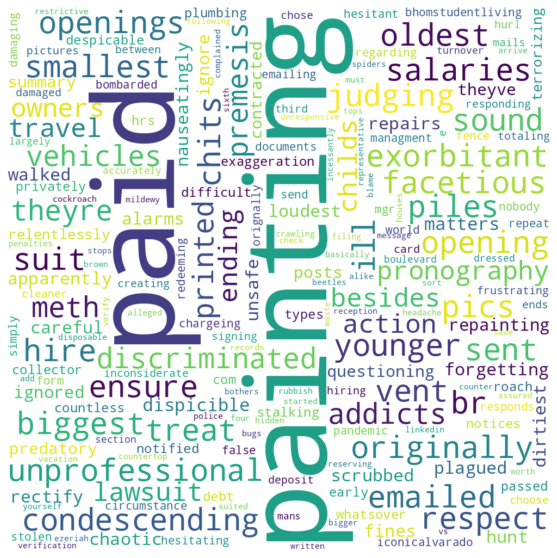

In [22]:
cloud(f['pmi_bad'])

In [23]:
f['good'] = termf(tqdm(df[df['review_rating']==5.0]['review_text']))

  0%|          | 0/161 [00:00<?, ?it/s]

In [24]:
f = f.fillna(0)

In [25]:
f.sort_values(ascending=False, by='good').head(10)

,all,bad,pmi_bad,good
the,865,447.0,-0.050952,251.0
and,656,298.0,-0.236910,243.0
a,420,187.0,-0.265877,149.0
i,485,250.0,-0.054583,148.0
to,538,307.0,0.092106,137.0
is,302,133.0,-0.281649,101.0
of,254,140.0,0.042072,73.0
great,91,4.0,-3.606321,72.0
in,247,130.0,-0.024526,70.0
with,155,63.0,-0.397371,69.0


In [26]:
N = f['all'].sum()
N_good = f['good'].sum()

In [27]:
f['pmi_good'] = np.log2(f['good']) + np.log2(N) - np.log2(f['all']) - np.log2(N_bad)

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
f.sort_values(ascending=False, by='pmi_good').head(10)

,all,bad,pmi_bad,good,pmi_good
nicest,2,0.0,-inf,2.0,0.901474
strongly,1,0.0,-inf,1.0,0.901474
washing,1,0.0,-inf,1.0,0.901474
budget,1,0.0,-inf,1.0,0.901474
upbeat,1,0.0,-inf,1.0,0.901474
dude,2,0.0,-inf,2.0,0.901474
personable,1,0.0,-inf,1.0,0.901474
faucet,1,0.0,-inf,1.0,0.901474
quickly,4,0.0,-inf,4.0,0.901474
c,1,0.0,-inf,1.0,0.901474


In [29]:
f[f['all']>30].sort_values(ascending=False, by='pmi_good').head(10)


,all,bad,pmi_bad,good,pmi_good
love,33,0.0,-inf,28.0,0.664434
iconic,54,10.0,-1.531486,43.0,0.572851
great,91,4.0,-3.606321,72.0,0.563604
helpful,57,5.0,-2.609488,42.0,0.460901
he,35,11.0,-0.768378,24.0,0.357153
help,39,8.0,-1.383929,25.0,0.259928
really,38,8.0,-1.346454,21.0,0.045864
very,85,21.0,-1.115600,45.0,-0.016064
staff,80,19.0,-1.172527,41.0,-0.062902
nice,55,7.0,-2.072531,28.0,-0.072531


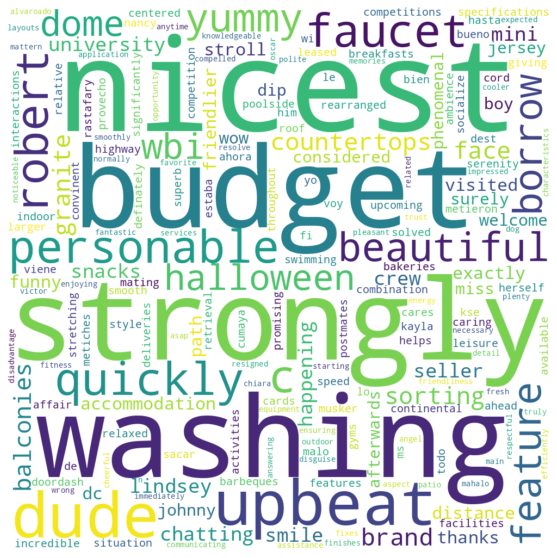

In [30]:
cloud(f['pmi_good'])

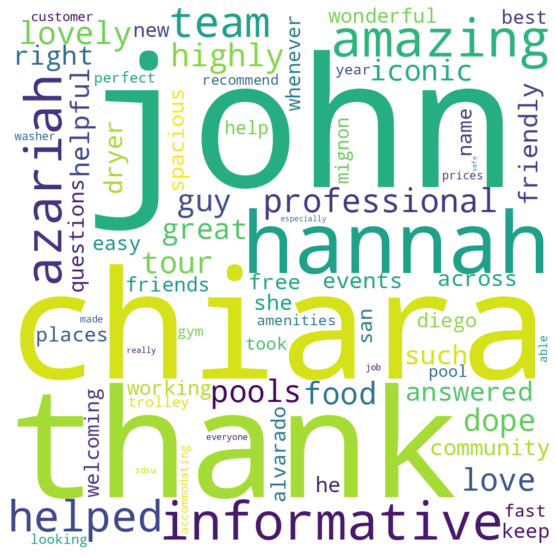

In [31]:
cloud(f[f['all']>5]['pmi_good'])